# Python Exercises

### Task1

In [2]:
#Modify your program to calculate the 
#Fourier transform of the sunspot data, and then create a graph
# of the Fourier coefficients as a function of k - 
#also known as the power spectrum of the sunspot signal
#  You should see that there is a noticeable peak in the 
#power spectrum at a non-zero value of k.
# The appearance of this peak shows you that there is a frequency in the Fourier series that
#has a higher amplitude than the others around it. 
#Find the approximate value of k to which the peak corresponds. What is the period of the sine wave
#with this value of k? How does it compare to the initially estimated value?

%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
from pylab import *

In [3]:
#it mostly fluctuates in spring and summer (the duration is 7 month)

In [4]:
from scipy import fftpack

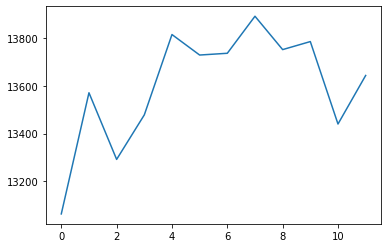

In [6]:
filename = "sunspots.txt"
data = genfromtxt(filename)
for m in range (12):
    n = m
    while(n < 3143):
        data[n,0] = m
        n = n+12

p= [0]*12
for x in range(12):
    for d in (data):
        if (d[0] == x):
            p[x] = p[x] + d[1]
month = [i for i in range(12)]
plt.plot(month,p)

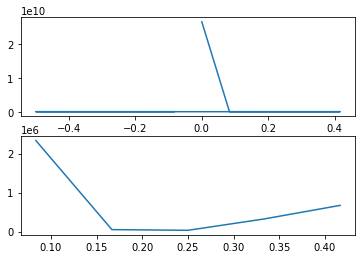

In [34]:
sig = fftpack.fft(p) 
ampl = np.abs(sig)**2
kfreq = fftpack.fftfreq(12,d = 1)
mask = np.where(kfreq > 0)
plt.subplot(2,1,1)
plt.plot(kfreq,ampl)
plt.subplot(2,1,2)
plt.plot(kfreq[mask],ampl[mask])

(0.08, 0.085)

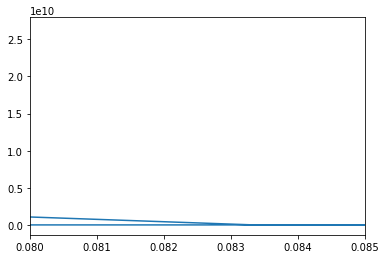

In [28]:
plt.plot(kfreq,ampl)
xlim([0.08,0.085])


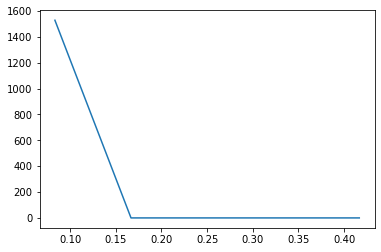

In [36]:
freq_cutoff = 0.0841;
sig_filtered = sig.copy()
sig_filtered[np.abs(kfreq) > freq_cutoff] = 0
ampli = np.abs(sig_filtered)
plt.plot(kfreq[mask],ampli[mask])

C:\Users\RoXy\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


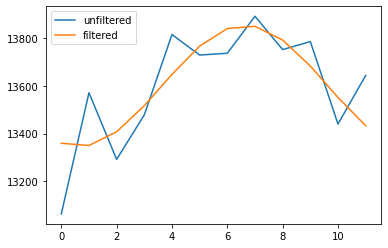

In [38]:
signew = fftpack.ifft(sig_filtered)
plt.plot(month,p,label= "unfiltered")
plt.plot(month,signew,label = "filtered")
plt.legend()
#the estimated value and the obtained value are almost the same.
#the peak of the fuctuations happens from june to sep almost 4 months.
# half cycle of the sine wave = 8 months

### Task 2

In [36]:
#Write a function to find the position of this zero to at least five decimal
# places using Newton's method
f = poly1d([1,0,-2,2])
print(f)
df = poly1d([3,0,-2])
print(df)

   3
1 x - 2 x + 2
   2
3 x - 2


In [37]:
a = arange(-3,3,0.01)

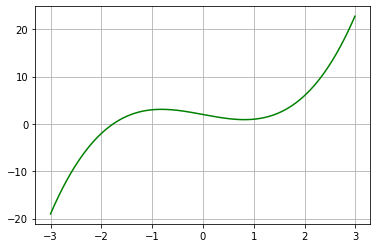

In [38]:
plt.plot(a,f(a),color="green",label = "function")
plt.grid()

In [39]:
def newton_method(f,df,iteration,x0):
    epsilon = finfo('float').eps
    while(True):
        x1 = x0 - f(x0)/df(x0)
        if (f(x1) - f(x0) < epsilon):
            return x1
        else:
            x0 = x1

In [51]:
val =newton_method(f,df,10,-2)

In [47]:
r = np.roots(f)

In [54]:
r[0],val

((-1.769292354238631+0j), -1.7692923542386314)

In [58]:
if (r[0] - val < 0.00001):
    print(True)
else:
    print(False)

True
